## Setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score  
import joblib
import os 

from src.utils import preprocess_data
from src.utils import feature_engg


## Data Ingestion

In [3]:
model_df = pd.read_csv(r"data\processed\cleaned.csv")

## Linear Regression Model

In [4]:
X= model_df[['area_type', 'total_sqft', 'bath', 'balcony', 'extract']]
Y = model_df['price']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

column_trans = ColumnTransformer(transformers=
                                 [('onehot', OneHotEncoder(), ['area_type', 'extract']),
                                  ('scaler', StandardScaler(), ['total_sqft', 'bath', 'balcony'])],
                                  remainder='passthrough')

pipeline = make_pipeline(column_trans, LinearRegression())

pipeline.fit(X, Y)

# y_pred = pipeline.predict(x_test)

filename = os.path.join("models", "1st_model_LR.joblib")
joblib.dump(pipeline, filename)

loaded_model_LR = joblib.load(filename)
result = loaded_model_LR.score(X, Y)
print(result)

0.6067557185468784


## Random Forest Regressor Model

In [4]:
X = model_df[['area_type', 'total_sqft', 'bath', 'balcony', 'extract']]
Y = model_df['price']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

column_trans = ColumnTransformer(transformers=
                                 [('onehot', OneHotEncoder(), ['area_type', 'extract']),
                                  ('scaler', StandardScaler(), ['total_sqft', 'bath', 'balcony'])],
                                  remainder='passthrough')

pipeline = make_pipeline(column_trans, RandomForestRegressor())

pipeline.fit(X, Y)

# y_pred = pipeline.predict(x_test)

filename = os.path.join("models", "1st_model_RF.joblib")
joblib.dump(pipeline, filename)

loaded_model_RF1 = joblib.load(filename)
result = loaded_model_RF1.score(X, Y)
print(result)


0.9008407235508414


Checking random forest by adding the parameter that was found to be highly correlated during EDA, but we know that since the values in parameter size were very less it is possible that the correlation matrix results are not as accurate.

In [7]:
X = model_df[['area_type','size','total_sqft', 'bath', 'balcony', 'extract']]
Y = model_df['price']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

column_trans = ColumnTransformer(transformers=
                                 [('onehot', OneHotEncoder(), ['area_type', 'extract']),
                                  ('scaler', StandardScaler(), ['size','total_sqft', 'bath', 'balcony'])],
                                  remainder='passthrough')

pipeline = make_pipeline(column_trans, RandomForestRegressor())

pipeline.fit(X, Y)

# y_pred = pipeline.predict(x_test)

filename = os.path.join("models", "2nd_model_RF.joblib")
joblib.dump(pipeline, filename)

loaded_model_RF2 = joblib.load(filename)
result = loaded_model_RF2.score(X, Y)
print(result)

0.9172092534407454


## Evaluation

Using the test data to evaluate our models created.
- We first read the test file
- Then preprocess the test file
- Finally we add the new features in the test file

In [16]:
test_data = pd.read_csv(r"data/raw/Test.csv")
clean_test_data = preprocess_data(test_data)
clean_test_data = feature_engg(clean_test_data)

### Linear Regression

In [8]:
x_test = clean_test_data[['area_type','total_sqft', 'bath', 'balcony', 'extract']]
y_pred = clean_test_data['price']

y_pred_lr = loaded_model_LR.predict(x_test)
result = loaded_model_LR.score(x_test, y_pred_lr)
print("R-squared value on test data:", result)

R-squared value on test data: 1.0


R-squared value on test data: 1.0


### Random Forest

Using the first random forest model

In [6]:
clean_test_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,month,ready,extract
0,Super built-up Area,Ready To Move,Brookefield,2.0,Roeekbl,7.111512,2.0,2.0,NaN,NaN,Ready To Move,Ready To Move
1,Plot Area,Ready To Move,Akshaya Nagar,9.0,others,7.783641,9.0,2.0,NaN,NaN,Ready To Move,Ready To Move
2,Plot Area,18-Apr,Hennur Road,4.0,Saandtt,7.409136,5.0,2.0,NaN,Apr,NaN,Apr
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3.0,Winerri,7.187657,3.0,1.0,NaN,NaN,Ready To Move,Ready To Move
4,Super built-up Area,Ready To Move,Konanakunte,2.0,AmageSa,7.057898,2.0,1.0,NaN,NaN,Ready To Move,Ready To Move


In [24]:
x_test = clean_test_data[['area_type','total_sqft', 'bath', 'balcony', 'extract']]
y_pred = clean_test_data['price']

loaded_model_RF1 = joblib.load(os.path.join("models", "1st_model_RF.joblib"))
y_pred_rf1 = loaded_model_RF1.predict(x_test)
price = np.expm1(y_pred_rf1)

# result = loaded_model_RF1.score(x_test, y_pred_rf1)
# print("R-squared value on test data:", result)

In [25]:
headerList = ['price']
pd.DataFrame(price).to_csv(r'data\final\submission_RF1.csv',header=headerList, index_label= 'id')

Using the second random forest model

In [17]:
x_test = clean_test_data[['area_type','size','total_sqft', 'bath', 'balcony', 'extract']]
y_pred = clean_test_data['price']

y_pred_rf2 = loaded_model_RF2.predict(x_test)
price = np.expm1(y_pred_rf2)
# result = loaded_model_RF2.score(x_test, y_pred_rf2)
# print("R-squared value on test data:", result)

In [22]:
headerList = ['price']
pd.DataFrame(price).to_csv(r'data\final\submission_RF2.csv',header=headerList, index_label= 'id')

## Machine hack r score

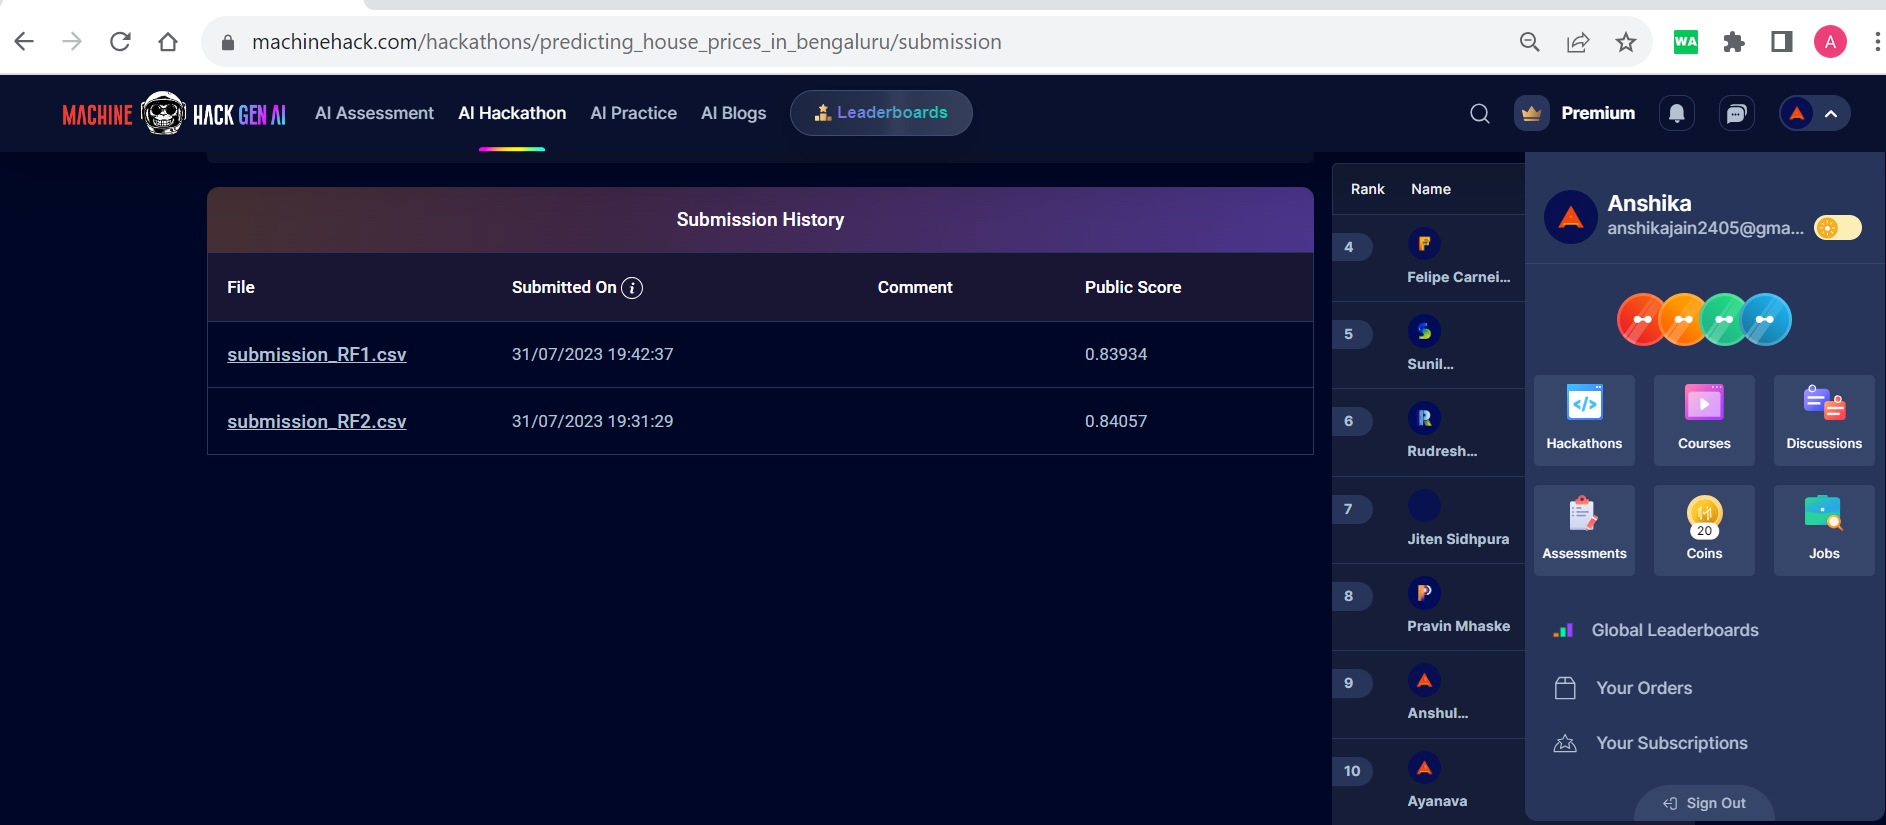